In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm, Normalize

df = pd.read_csv('/Users/tlh4362/Desktop/RDV/processed_variants_all.tsv', sep = '\t')
mutations = pd.read_csv('/Users/tlh4362/Desktop/RDV/mutations_identified.csv')
sixang = pd.read_csv('/Users/tlh4362/Desktop/RDV/within6a.csv')

In [2]:
df['total'].unique().sum()

15998330

In [3]:
total = df['total'].unique().sum()
nsp12_mutdf = pd.DataFrame()
nsp12 = df[df['protein']=='NSP12']
for mut in nsp12['mutation'].unique():
    mut_sum = nsp12[nsp12['mutation']==mut]['count'].sum()
    nsp12_mutdf.at[mut, 'GISAID'] = mut_sum/total

In [4]:
sixang_mutdf = pd.DataFrame()
nsp12 = df[df['protein']=='NSP12']


In [5]:
    
res = {}
for mut in sixang['mutation']:
    reslist = []
    for idx, ele in enumerate(list(nsp12['mutation'].unique())):
        if str(mut) in ele:
            reslist.append(idx)
    res[str(mut)] = pd.Series(nsp12['mutation'].unique()).iloc[reslist]


In [6]:
sixang_df = pd.DataFrame()
for k,v in zip(res.keys(), res.values()):
    sixang_df.at[k,'Frequency'] = nsp12[nsp12['mutation'].isin(v)]['count'].sum()/total
#     print(k,nsp12[nsp12['mutation'].isin(v)]['count'].sum()/total)
#     print(k,v)

In [7]:
sixang_df = sixang_df*100

<ipython-input-8-4022c784a53f>:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_bad("lightgray")


Text(0.5, 1.0, 'Positions 6A away from RDV binding pocket')

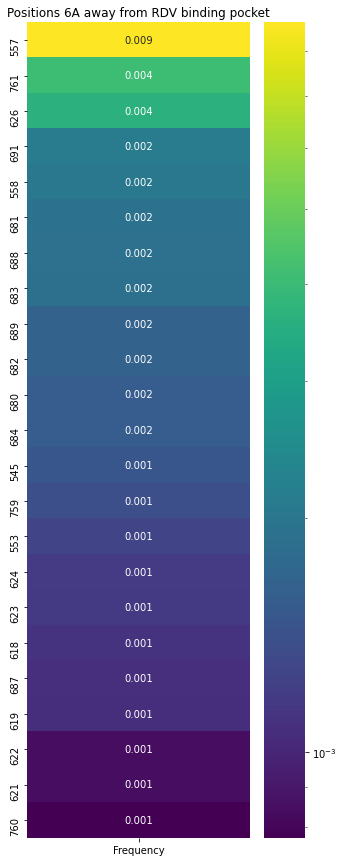

In [8]:
plt.figure(figsize = [5,15])
cmap = plt.get_cmap('viridis')
cmap.set_bad("lightgray")
sns.heatmap(sixang_df.sort_values(by = 'Frequency', ascending = False), annot = True,fmt=".3f", cmap = cmap, cbar = True, norm=LogNorm())
plt.title('Positions 6A away from RDV binding pocket')

# plt.savefig('/Users/tlh4362/Desktop/6a_away.eps',format = 'eps', bbox_inches = 'tight')

In [9]:
mutations

,mutations,experiment
0,I168T,In vitro
1,S759A,In vitro
2,V792I,In vivo/In vitro
3,D484Y,In vivo
4,E802D,In vivo/In vitro
5,V166L,In vivo/In vitro
6,V166A,In vivo/In vitro
7,E796G,In vitro
8,C799F,In vivo/In vitro
9,K59N,In vivo/In vitro


In [10]:
for idx in mutations.index:
    if 'vivo' in mutations.loc[idx,'experiment'].lower():
        mut = mutations.loc[idx,'mutations']
        mut_sum = nsp12[nsp12['mutation']==mut]['count'].sum()
        nsp12_mutdf.at[mut, 'in vivo'] = mut_sum/total
    
    if 'vitro' in mutations.loc[idx,'experiment'].lower():
        mut = mutations.loc[idx,'mutations']
        mut_sum = nsp12[nsp12['mutation']==mut]['count'].sum()
        nsp12_mutdf.at[mut, 'in vitro'] = mut_sum/total
    
    if 'silico' in mutations.loc[idx,'experiment'].lower():
        mut = mutations.loc[idx,'mutations']
        mut_sum = nsp12[nsp12['mutation']==mut]['count'].sum()
        nsp12_mutdf.at[mut, 'in silico'] = mut_sum/total
nsp12_mutdf = nsp12_mutdf.fillna(0)


In [11]:
nsp12_mutdf = nsp12_mutdf.fillna(0)

nsp12_mutdf = nsp12_mutdf.loc[(nsp12_mutdf!=0).any(axis=1)]

In [12]:
nsp12_thresholddf = nsp12_mutdf[(nsp12_mutdf['in silico'] > 0) | (nsp12_mutdf['in vitro'] > 0) | (nsp12_mutdf['in vivo'] > 0)]
nsp12_thresholddf = nsp12_thresholddf*100


In [13]:
nsp12_thresholddf

,GISAID,in vitro,in vivo,in silico
A16V,0.074064,0.000000,0.074064,0.000000
Y32C,0.002200,0.000000,0.002200,0.000000
K59N,0.043386,0.043386,0.043386,0.000000
E83D,0.000050,0.000000,0.000050,0.000000
T85I,0.071920,0.000000,0.000000,0.071920
A97V,0.109561,0.109561,0.000000,0.000000
M124I,0.095397,0.000000,0.000000,0.095397
D135Y,0.002213,0.000000,0.000000,0.002213
T141I,0.077977,0.000000,0.000000,0.077977
V166A,0.001800,0.001800,0.001800,0.000000


In [14]:
mask = nsp12_thresholddf.sort_values(by = 'GISAID', ascending = False)==0

<ipython-input-15-241dbf2a7c04>:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_bad("lightgray")
<ipython-input-15-241dbf2a7c04>:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_bad("lightgray")
<ipython-input-15-241dbf2a7c04>:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl

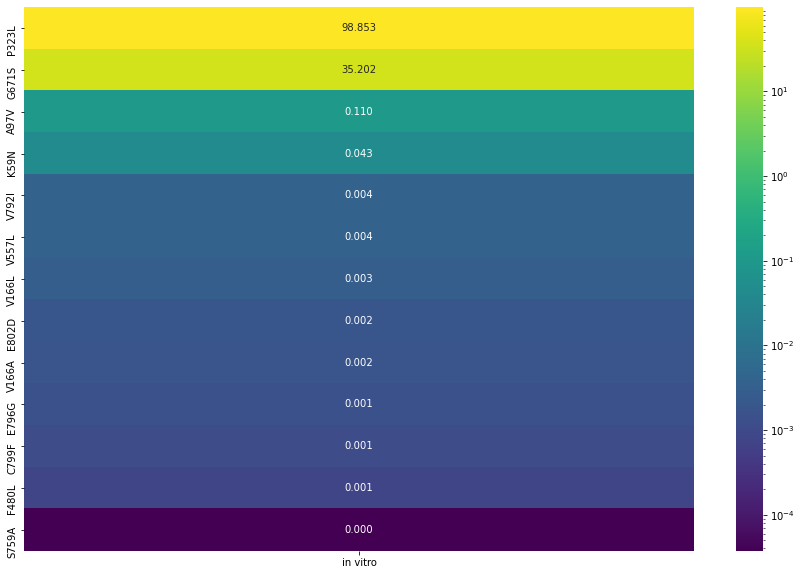

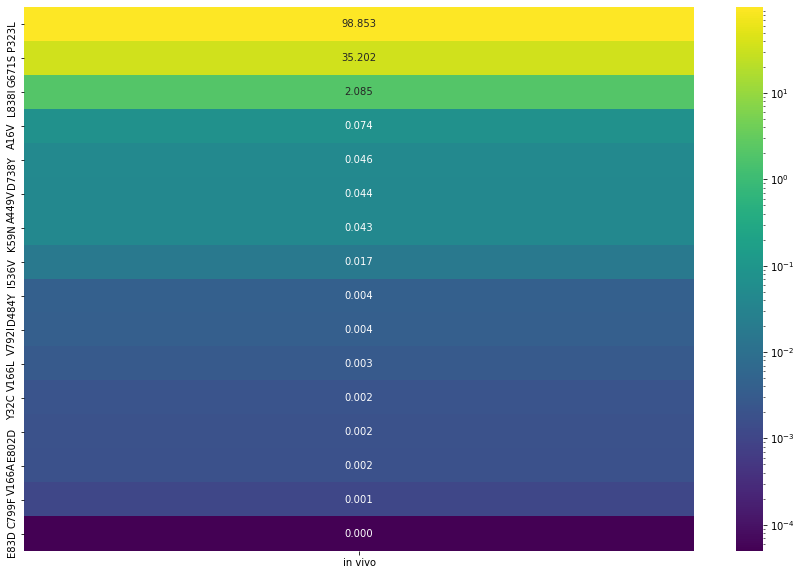

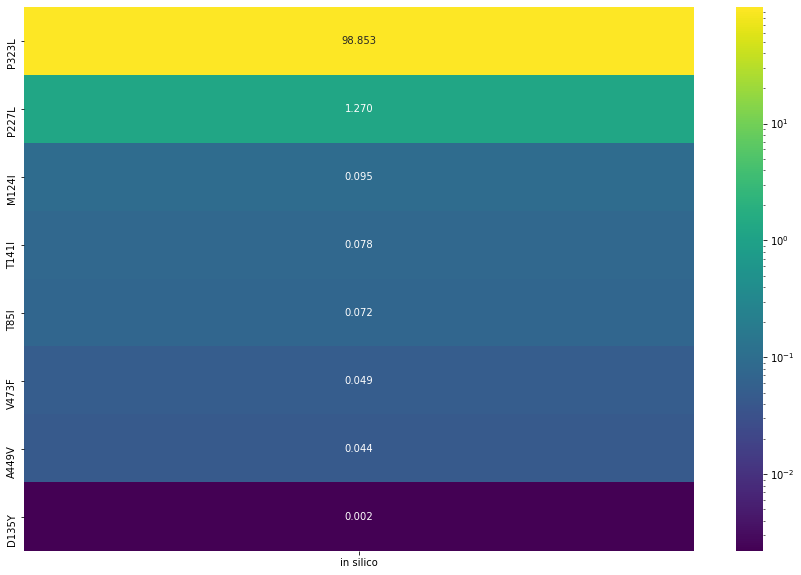

In [15]:
for c in nsp12_thresholddf.columns:
    if c != 'GISAID':
        newdf = pd.DataFrame(nsp12_thresholddf[c].sort_values(ascending = False))
        newdf = newdf[newdf!=0].dropna()
        plt.figure(figsize = [15,10])
        cmap = plt.get_cmap('viridis')
        cmap.set_bad("lightgray")
        sns.heatmap(newdf, annot = True,fmt=".3f", cbar = True,cmap = cmap, norm=LogNorm())
        plt.savefig('/Users/tlh4362/Desktop/mut_freq_{}.eps'.format(c), format = 'eps', bbox_inches = 'tight')
        

<ipython-input-37-e2c59d799636>:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_bad("lightgray")


<AxesSubplot:>

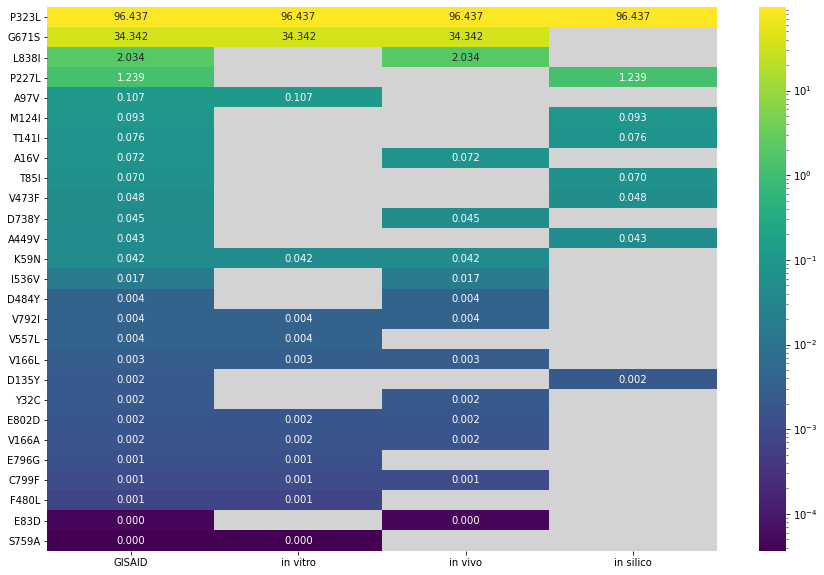

In [37]:
plt.figure(figsize = [15,10])
cmap = plt.get_cmap('viridis')
cmap.set_bad("lightgray")

sns.heatmap(nsp12_thresholddf.sort_values(by = 'GISAID', ascending = False), annot = True,fmt=".3f", cbar = True,mask = mask,cmap = cmap, norm=LogNorm())

# plt.savefig('/Users/tlh4362/Desktop/mut_freq.eps', format = 'eps', bbox_inches = 'tight')

In [16]:
insilicogenes = nsp12_thresholddf[(nsp12_thresholddf['Frequency-GISAID']!=0) & (nsp12_thresholddf['Frequency-in silico']!=0)].index

In [18]:
invitrogenes = nsp12_thresholddf[(nsp12_thresholddf['Frequency-GISAID']!=0) & (nsp12_thresholddf['Frequency-in vitro']!=0)].index



In [51]:
invivogenes = nsp12_thresholddf[(nsp12_thresholddf['Frequency-GISAID']!=0) & (nsp12_thresholddf['Frequency-in vivo']!=0)].index


Text(0.5, 1.0, 'In silico')

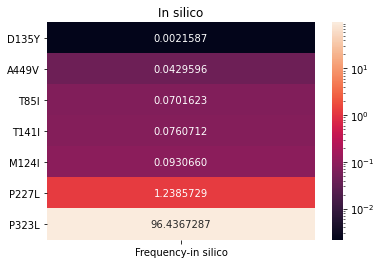

In [55]:

sns.heatmap(pd.DataFrame(nsp12_thresholddf.loc[insilicogenes,]['Frequency-in silico'].sort_values(ascending = True)), annot = True,vmax = 100,  fmt=".7f", norm=LogNorm())

plt.title('In silico')


Text(0.5, 1.0, 'In vitro')

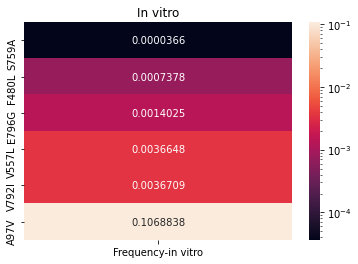

In [53]:
sns.heatmap(pd.DataFrame(nsp12_thresholddf.loc[invitrogenes,]['Frequency-in vitro'].sort_values(ascending = True)), annot = True, fmt=".7f", vmax = 100, norm=LogNorm())

plt.title('In vitro')


Text(0.5, 1.0, 'In vivo')

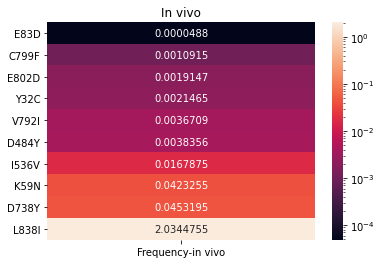

In [57]:
sns.heatmap(pd.DataFrame(nsp12_thresholddf.loc[invivogenes,]['Frequency-in vivo'].sort_values(ascending = True)), annot = True, fmt=".7f", norm=LogNorm())

plt.title('In vivo')
